# Heatmaps for License Groups

# SQL

In [ ]:
cross_percent_df = _deepnote_execute_sql('SELECT *\nFROM \'Cross_percent.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
cross_percent_df

TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...       0.000000   
1    ['105th Street and Vincennes Avenue', 'Roselan...       0.000000   
2                ['105th Street and Vincennes Avenue']       0.002922   
3                                    ['107th/Halsted']       0.000000   
4     ['111th Street/Kedzie Avenue Business District']       0.000000   
..                                                 ...            ...   
120                                  ['Western/Ogden']       0.003388   
121               ['Wilson Yard', 'Lawrence/Broadway']       0.000000   
122                                    ['Wilson Yard']       0.003522   
123                                       ['Woodlawn']       0.002459   
124                                                 []       0.002350   

     Business  Electronic  Entertainment      Food    Liquor   Medical  \
0    0.062500    0.000000       0.000000  0.937500  0.000000  0.000000   
1    0.285714    0.000000       0.000000  0.457143  0.000000  0.000000   
2    0.466764    0.001461       0.002191  0.201972  0.000000  0.000000   
3    0.401836    0.001995       0.001197  0.201516  0.000000  0.003192   
4    0.480866    0.003021       0.010070  0.236657  0.005539  0.000000   
..        ...         ...            ...       ...       ...       ...   
120  0.471203    0.001412       0.007905  0.178430  0.001412  0.000000   
121  1.000000    0.000000       0.000000  0.000000  0.000000  0.000000   
122  0.481655    0.005870       0.020546  0.259172  0.000000  0.000000   
123  0.455439    0.001844       0.011678  0.207130  0.000615  0.000000   
124  0.463781    0.002224       0.016200  0.208032  0.006037  0.000334   

        Other   Permits  Personal Services    Retail   Special   Tabacco  \
0    0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
1    0.257143  0.000000           0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.057706           0.000730  0.007670  0.082907  0.098977   
3    0.000000  0.051476           0.000000  0.013168  0.160814  0.084198   
4    0.017120  0.007553           0.021148  0.054381  0.091138  0.042296   
..        ...       ...                ...       ...       ...       ...   
120  0.000000  0.010164           0.000000  0.018351  0.217956  0.033879   
121  0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
122  0.002935  0.016437           0.008512  0.022014  0.103904  0.071617   
123  0.005532  0.045482           0.000615  0.028273  0.097111  0.103258   
124  0.002688  0.011032           0.011556  0.028975  0.166347  0.047753   

     Vehicles  
0    0.000000  
1    0.000000  
2    0.076698  
3    0.080607  
4    0.030211  
..        ...  
120  0.055901  
121  0.000000  
122  0.003816  
123  0.040565  
124  0.032692  

[125 rows x 15 columns]

In [ ]:
cross_values_df = _deepnote_execute_sql('SELECT *\nFROM \'Cross_values.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
cross_values_df

TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...              0   
1    ['105th Street and Vincennes Avenue', 'Roselan...              0   
2                ['105th Street and Vincennes Avenue']              8   
3                                    ['107th/Halsted']              0   
4     ['111th Street/Kedzie Avenue Business District']              0   
..                                                 ...            ...   
120                                  ['Western/Ogden']             12   
121               ['Wilson Yard', 'Lawrence/Broadway']              0   
122                                    ['Wilson Yard']             12   
123                                       ['Woodlawn']              4   
124                                                 []           1247   

     Business  Electronic  Entertainment    Food  Liquor  Medical  Other  \
0           1           0              0      15       0        0      0   
1          10           0              0      16       0        0      9   
2        1278           4              6     553       0        0      0   
3        1007           5              3     505       0        8      0   
4         955           6             20     470      11        0     34   
..        ...         ...            ...     ...     ...      ...    ...   
120      1669           5             28     632       5        0      0   
121        11           0              0       0       0        0      0   
122      1641          20             70     883       0        0     10   
123       741           3             19     337       1        0      9   
124    246063        1180           8595  110373    3203      177   1426   

     Permits  Personal Services  Retail  Special  Tabacco  Vehicles  
0          0                  0       0        0        0         0  
1          0                  0       0        0        0         0  
2        158                  2      21      227      271       210  
3        129                  0      33      403      211       202  
4         15                 42     108      181       84        60  
..       ...                ...     ...      ...      ...       ...  
120       36                  0      65      772      120       198  
121        0                  0       0        0        0         0  
122       56                 29      75      354      244        13  
123       74                  1      46      158      168        66  
124     5853               6131   15373    88257    25336     17345  

[125 rows x 15 columns]

# Python

In [ ]:
!pip install geopy
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
import json
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 11.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
cross_values_df

TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...              0   
1    ['105th Street and Vincennes Avenue', 'Roselan...              0   
2                ['105th Street and Vincennes Avenue']              8   
3                                    ['107th/Halsted']              0   
4     ['111th Street/Kedzie Avenue Business District']              0   
..                                                 ...            ...   
120                                  ['Western/Ogden']             12   
121               ['Wilson Yard', 'Lawrence/Broadway']              0   
122                                    ['Wilson Yard']             12   
123                                       ['Woodlawn']              4   
124                                                 []           1247   

     Business  Electronic  Entertainment    Food  Liquor  Medical  Other  \
0           1           0              0      15       0        0      0   
1          10           0              0      16       0        0      9   
2        1278           4              6     553       0        0      0   
3        1007           5              3     505       0        8      0   
4         955           6             20     470      11        0     34   
..        ...         ...            ...     ...     ...      ...    ...   
120      1669           5             28     632       5        0      0   
121        11           0              0       0       0        0      0   
122      1641          20             70     883       0        0     10   
123       741           3             19     337       1        0      9   
124    246063        1180           8595  110373    3203      177   1426   

     Permits  Personal Services  Retail  Special  Tabacco  Vehicles  
0          0                  0       0        0        0         0  
1          0                  0       0        0        0         0  
2        158                  2      21      227      271       210  
3        129                  0      33      403      211       202  
4         15                 42     108      181       84        60  
..       ...                ...     ...      ...      ...       ...  
120       36                  0      65      772      120       198  
121        0                  0       0        0        0         0  
122       56                 29      75      354      244        13  
123       74                  1      46      158      168        66  
124     5853               6131   15373    88257    25336     17345  

[125 rows x 15 columns]

In [ ]:
tif_geo = gpd.read_file('Boundaries TIF.geojson')[['name', 'geometry']]
tif_geo

name  \
0                116th/Avenue O   
1            Bryn Mawr/Broadway   
2            51st and Lake Park   
3                     Lakefront   
4                  Madden/Wells   
..                          ...   
116              Lincoln Avenue   
117                63rd/Pulaski   
118  Cortland and Chicago River   
119              Canal/Congress   
120     Madison/Austin Corridor   

                                              geometry  
0    MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ...  
1    MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ...  
2    MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ...  
3    MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ...  
4    MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ...  
..                                                 ...  
116  MULTIPOLYGON (((-87.71047 41.99673, -87.71047 ...  
117  MULTIPOLYGON (((-87.72180 41.76583, -87.72186 ...  
118  MULTIPOLYGON (((-87.66612 41.92000, -87.66603 ...  
119  MULTIPOLYGON (((-87.64485 41.88255, -87.64474 ...  
120  MULTIPOLYGON (((-87.76715 41.89150, -87.76715 ...  

[121 rows x 2 columns]

In [ ]:
for column in cross_values_df:
    tif_geo[column] = cross_values_df[column]

tif_geo

name  \
0                116th/Avenue O   
1            Bryn Mawr/Broadway   
2            51st and Lake Park   
3                     Lakefront   
4                  Madden/Wells   
..                          ...   
116              Lincoln Avenue   
117                63rd/Pulaski   
118  Cortland and Chicago River   
119              Canal/Congress   
120     Madison/Austin Corridor   

                                              geometry  \
0    MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ...   
1    MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ...   
2    MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ...   
3    MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ...   
4    MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ...   
..                                                 ...   
116  MULTIPOLYGON (((-87.71047 41.99673, -87.71047 ...   
117  MULTIPOLYGON (((-87.72180 41.76583, -87.72186 ...   
118  MULTIPOLYGON (((-87.66612 41.92000, -87.66603 ...   
119  MULTIPOLYGON (((-87.64485 41.88255, -87.64474 ...   
120  MULTIPOLYGON (((-87.76715 41.89150, -87.76715 ...   

                                              TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...              0   
1    ['105th Street and Vincennes Avenue', 'Roselan...              0   
2                ['105th Street and Vincennes Avenue']              8   
3                                    ['107th/Halsted']              0   
4     ['111th Street/Kedzie Avenue Business District']              0   
..                                                 ...            ...   
116                           ['Western Avenue North']              7   
117                           ['Western Avenue South']              0   
118  ['Western Avenue/Rock Island', '119th Street/I...              0   
119                     ['Western Avenue/Rock Island']              0   
120                                  ['Western/Ogden']             12   

     Business  Electronic  Entertainment  Food  Liquor  Medical  Other  \
0           1           0              0    15       0        0      0   
1          10           0              0    16       0        0      9   
2        1278           4              6   553       0        0      0   
3        1007           5              3   505       0        8      0   
4         955           6             20   470      11        0     34   
..        ...         ...            ...   ...     ...      ...    ...   
116      3312          34             69  2335      22        0     76   
117      2608          11             83  1714      27        0     29   
118         0           0              0     5       0        0      0   
119      3034          10             51  1200      19        0      2   
120      1669           5             28   632       5        0      0   

     Permits  Personal Services  Retail  Special  Tabacco  Vehicles  
0          0                  0       0        0        0         0  
1          0                  0       0        0        0         0  
2        158                  2      21      227      271       210  
3        129                  0      33      403      211       202  
4         15                 42     108      181       84        60  
..       ...                ...     ...      ...      ...       ...  
116      117                 95     317      744      511       288  
117       51                 42     231      751      310       466  
118        0                  0       0        0        0         0  
119      130                 69     141      468      264       270  
120       36                  0      65      772      120       198  

[121 rows x 17 columns]

In [ ]:
tif_geo.columns

Index(['name', 'geometry', 'TIF_Name', 'Accommodation', 'Business',
       'Electronic', 'Entertainment', 'Food', 'Liquor', 'Medical', 'Other',
       'Permits', 'Personal Services', 'Retail', 'Special', 'Tabacco',
       'Vehicles'],
      dtype='object')

<AxesSubplot: >

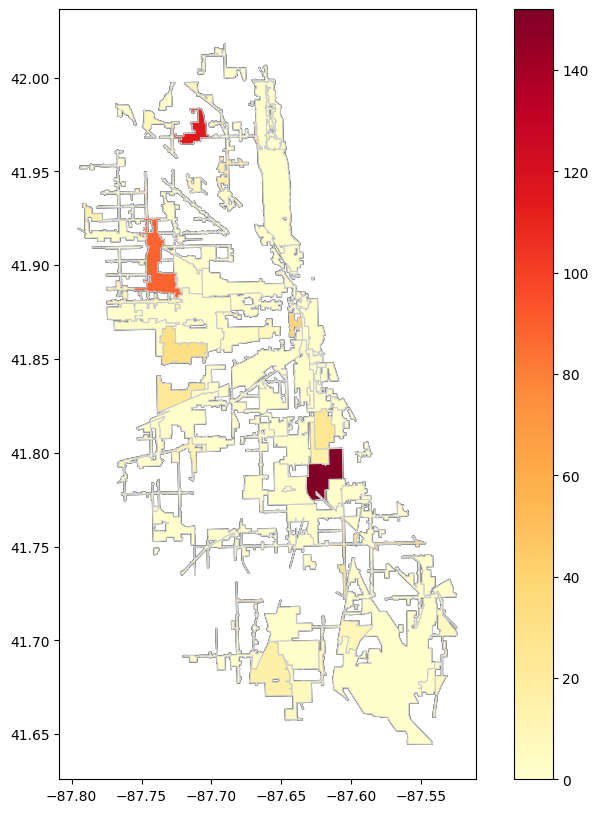

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tif_geo.plot(ax=ax, color='lightgrey', edgecolor='black')

# Customize the plot to display a heatmap of the number of companies
tif_geo.plot(column='Accommodation', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<AxesSubplot: >

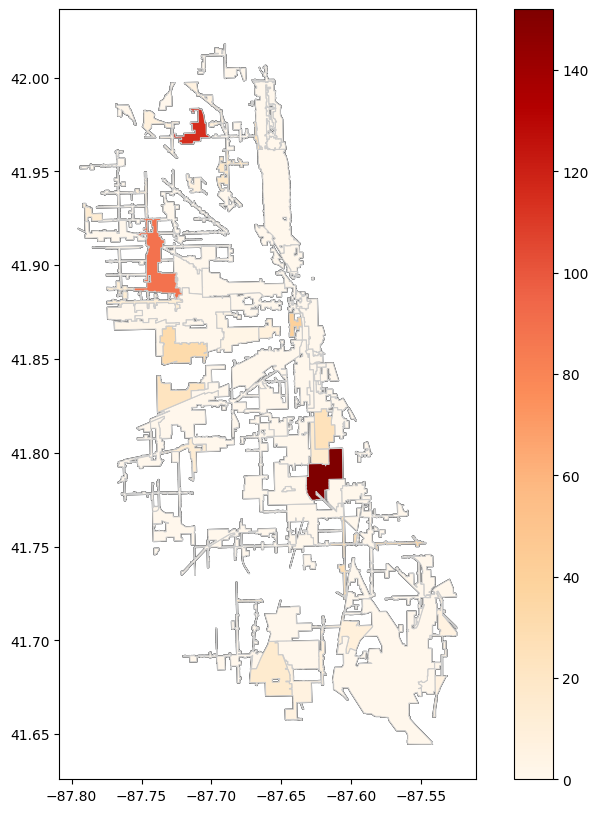

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tif_geo.plot(ax=ax, color='lightgrey', edgecolor='black')

# Customize the plot to display a heatmap of the number of companies
tif_geo.plot(column='Accommodation', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


<AxesSubplot: >

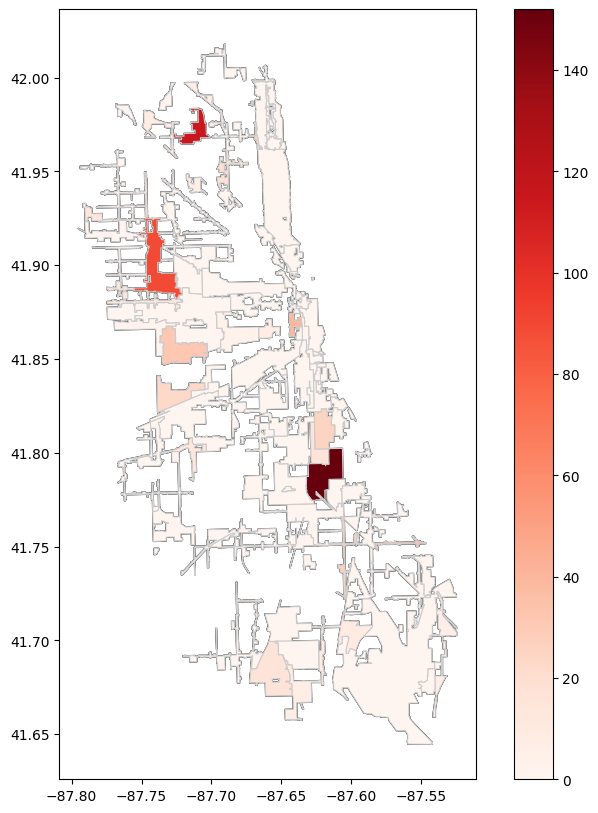

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tif_geo.plot(ax=ax, color='lightgrey', edgecolor='black')

# Customize the plot to display a heatmap of the number of companies
tif_geo.plot(column='Accommodation', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<AxesSubplot: >

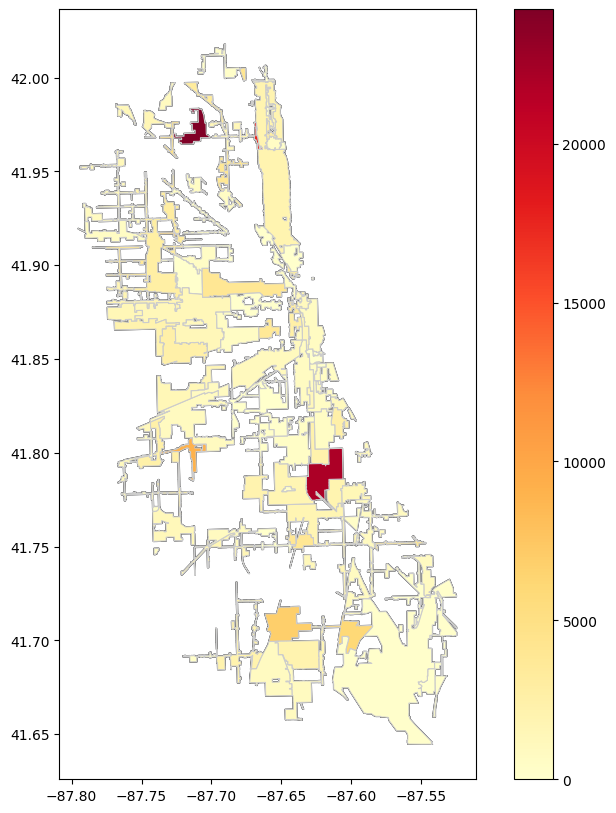

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tif_geo.plot(ax=ax, color='lightgrey', edgecolor='black')

# Customize the plot to display a heatmap of the number of companies
tif_geo.plot(column='Business', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

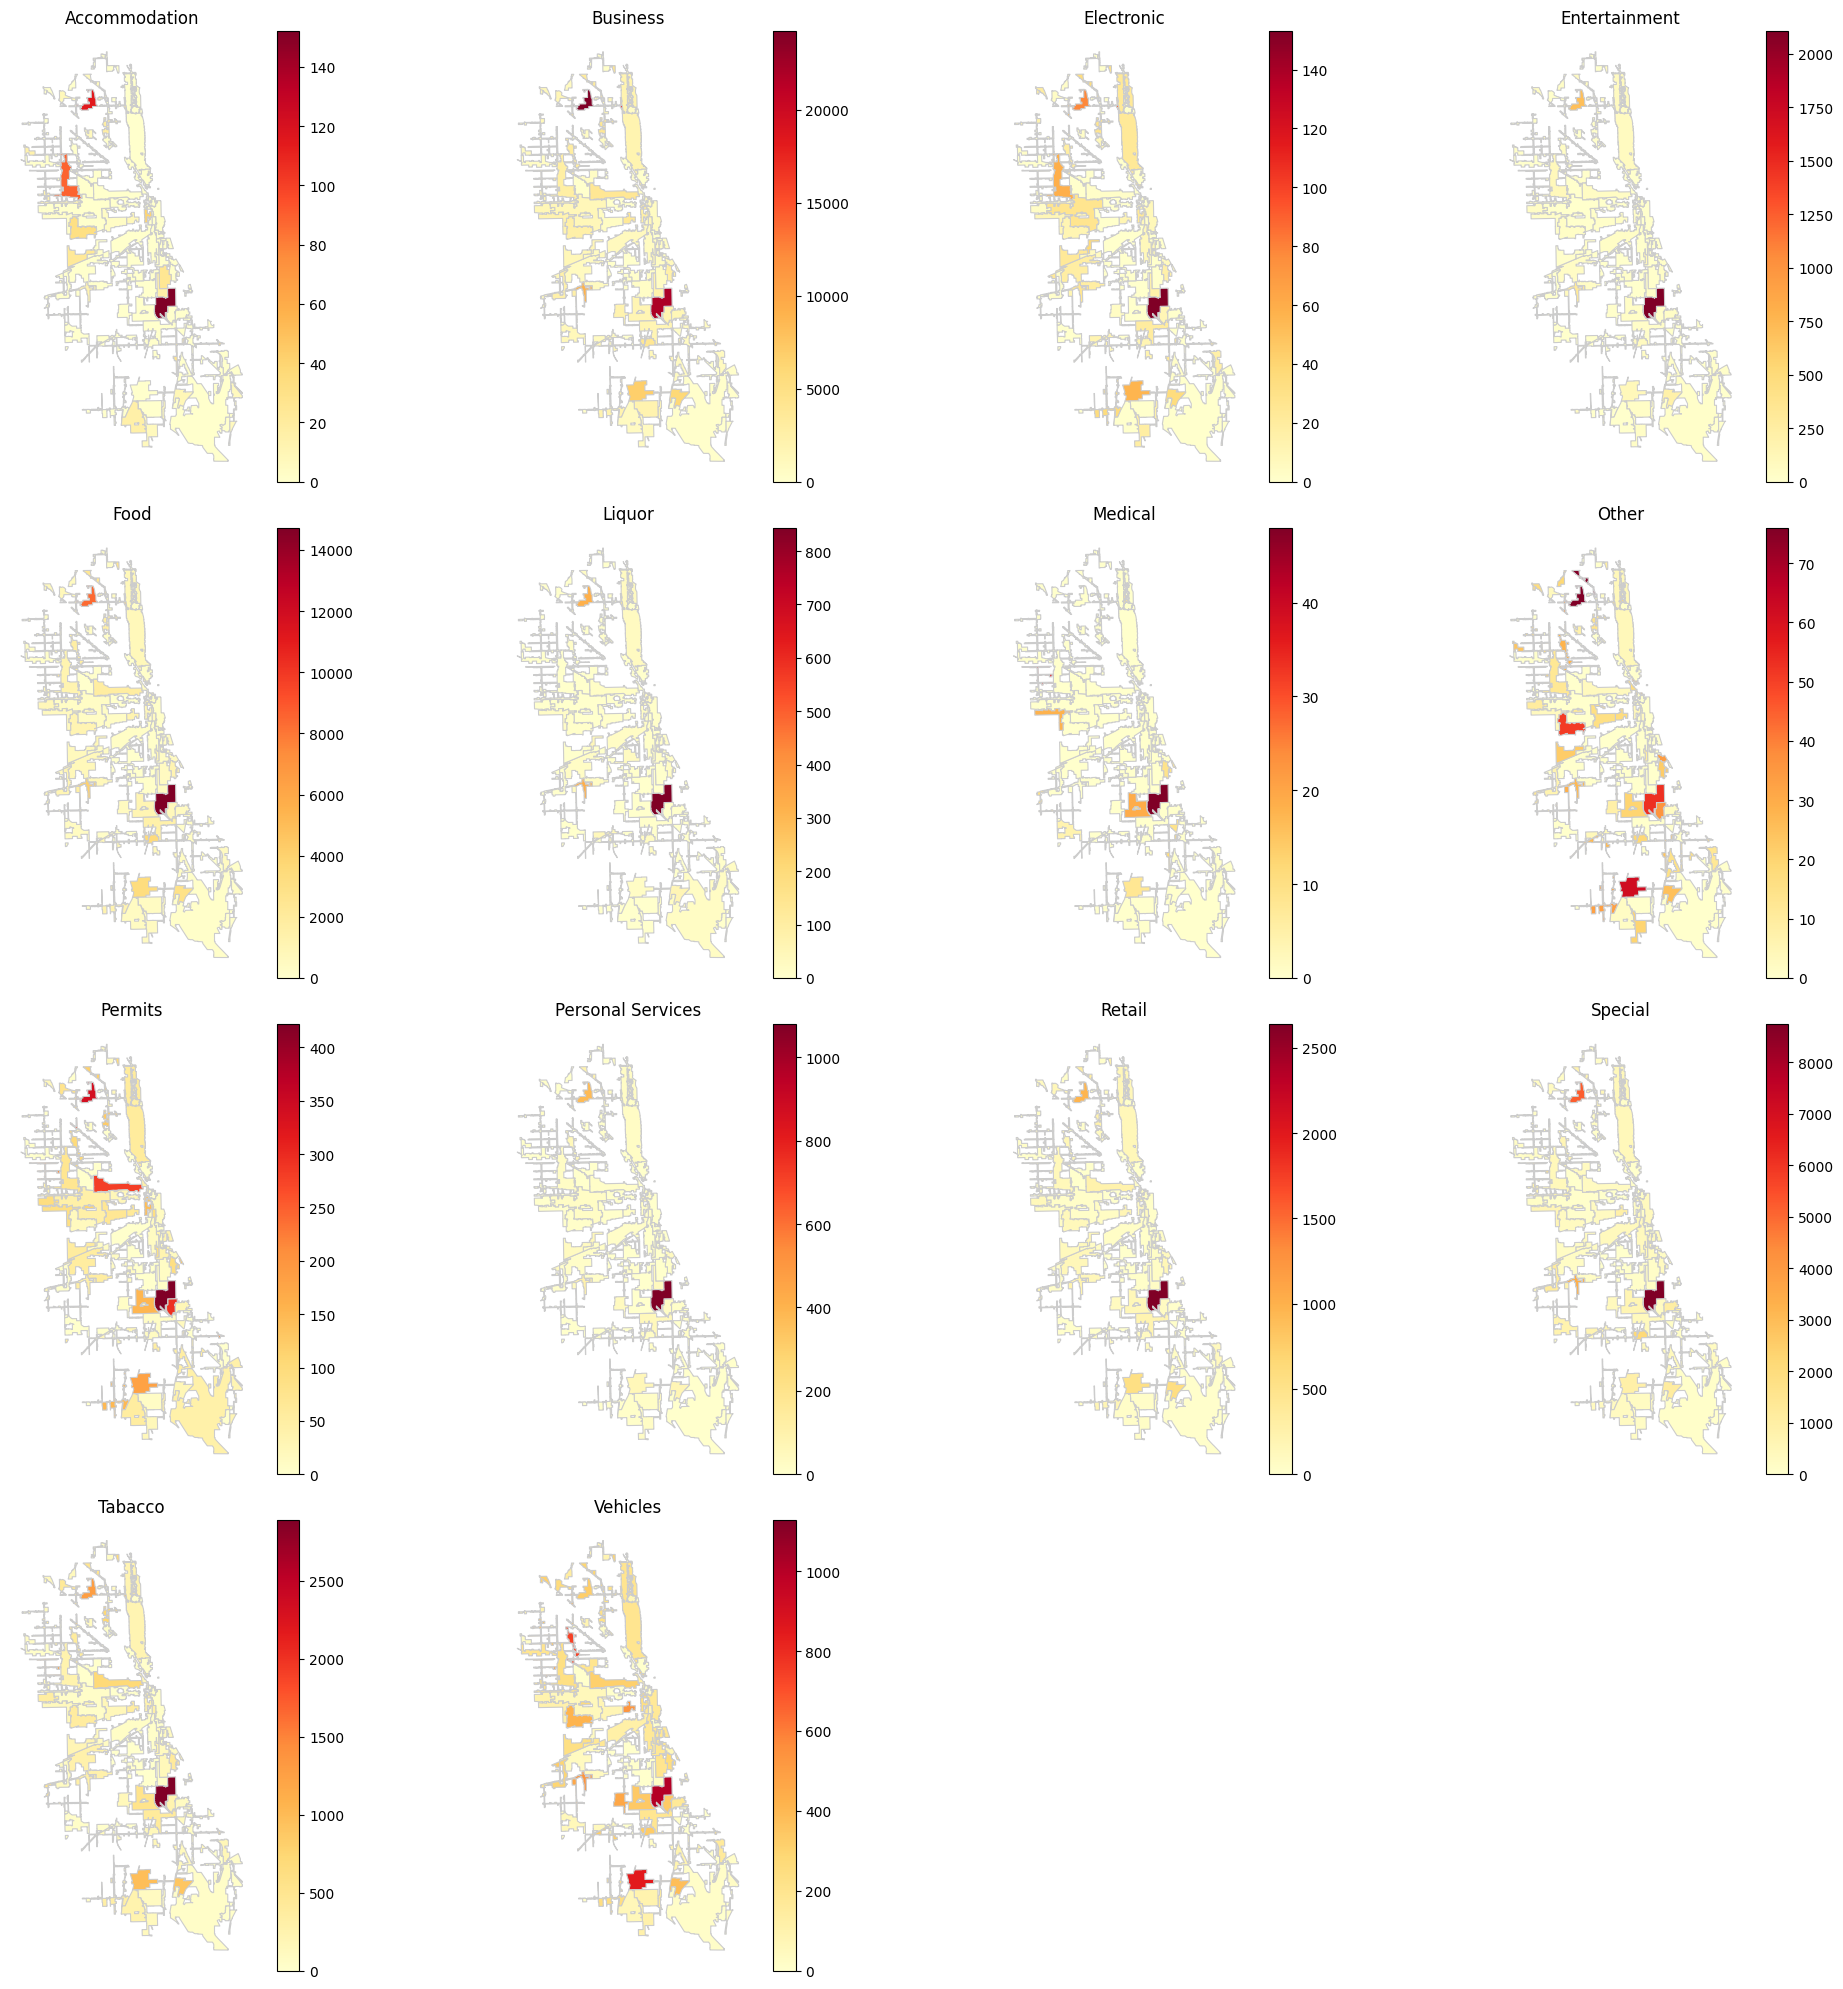

In [ ]:


# Assuming 'tif_geo' is your GeoDataFrame

# List of columns to plot
columns = ['Accommodation', 'Business', 'Electronic', 'Entertainment', 'Food', 
           'Liquor', 'Medical', 'Other', 'Permits', 'Personal Services', 
           'Retail', 'Special', 'Tabacco', 'Vehicles']

# Calculate the number of rows and columns for the subplot grid
n_cols = 4
n_rows = int(len(columns) / n_cols) + (1 if len(columns) % n_cols else 0)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each column and plot
for i, column in enumerate(columns):
    tif_geo.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=axs[i], edgecolor='0.8', legend=True)
    axs[i].set_title(column)
    axs[i].set_axis_off()

# Hide any unused subplots
for ax in axs[len(columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


<AxesSubplot: >

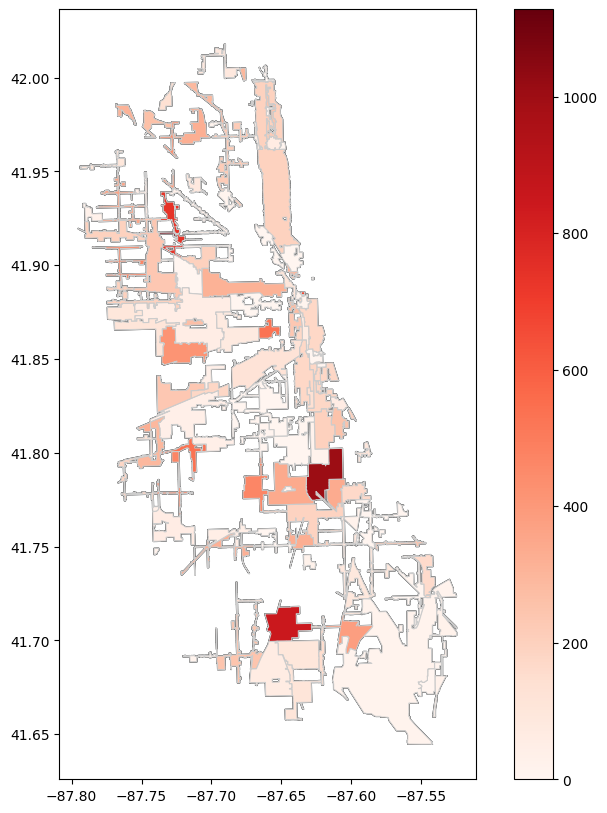

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
tif_geo.plot(ax=ax, color='lightgrey', edgecolor='black')

# Customize the plot to display a heatmap of the number of companies
tif_geo.plot(column='Vehicles', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [ ]:
cross_percent_df

TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...       0.000000   
1    ['105th Street and Vincennes Avenue', 'Roselan...       0.000000   
2                ['105th Street and Vincennes Avenue']       0.002922   
3                                    ['107th/Halsted']       0.000000   
4     ['111th Street/Kedzie Avenue Business District']       0.000000   
..                                                 ...            ...   
120                                  ['Western/Ogden']       0.003388   
121               ['Wilson Yard', 'Lawrence/Broadway']       0.000000   
122                                    ['Wilson Yard']       0.003522   
123                                       ['Woodlawn']       0.002459   
124                                                 []       0.002350   

     Business  Electronic  Entertainment      Food    Liquor   Medical  \
0    0.062500    0.000000       0.000000  0.937500  0.000000  0.000000   
1    0.285714    0.000000       0.000000  0.457143  0.000000  0.000000   
2    0.466764    0.001461       0.002191  0.201972  0.000000  0.000000   
3    0.401836    0.001995       0.001197  0.201516  0.000000  0.003192   
4    0.480866    0.003021       0.010070  0.236657  0.005539  0.000000   
..        ...         ...            ...       ...       ...       ...   
120  0.471203    0.001412       0.007905  0.178430  0.001412  0.000000   
121  1.000000    0.000000       0.000000  0.000000  0.000000  0.000000   
122  0.481655    0.005870       0.020546  0.259172  0.000000  0.000000   
123  0.455439    0.001844       0.011678  0.207130  0.000615  0.000000   
124  0.463781    0.002224       0.016200  0.208032  0.006037  0.000334   

        Other   Permits  Personal Services    Retail   Special   Tabacco  \
0    0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
1    0.257143  0.000000           0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.057706           0.000730  0.007670  0.082907  0.098977   
3    0.000000  0.051476           0.000000  0.013168  0.160814  0.084198   
4    0.017120  0.007553           0.021148  0.054381  0.091138  0.042296   
..        ...       ...                ...       ...       ...       ...   
120  0.000000  0.010164           0.000000  0.018351  0.217956  0.033879   
121  0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
122  0.002935  0.016437           0.008512  0.022014  0.103904  0.071617   
123  0.005532  0.045482           0.000615  0.028273  0.097111  0.103258   
124  0.002688  0.011032           0.011556  0.028975  0.166347  0.047753   

     Vehicles  
0    0.000000  
1    0.000000  
2    0.076698  
3    0.080607  
4    0.030211  
..        ...  
120  0.055901  
121  0.000000  
122  0.003816  
123  0.040565  
124  0.032692  

[125 rows x 15 columns]

In [ ]:
tif_geo

name  \
0                116th/Avenue O   
1            Bryn Mawr/Broadway   
2            51st and Lake Park   
3                     Lakefront   
4                  Madden/Wells   
..                          ...   
116              Lincoln Avenue   
117                63rd/Pulaski   
118  Cortland and Chicago River   
119              Canal/Congress   
120     Madison/Austin Corridor   

                                              geometry  \
0    MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ...   
1    MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ...   
2    MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ...   
3    MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ...   
4    MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ...   
..                                                 ...   
116  MULTIPOLYGON (((-87.71047 41.99673, -87.71047 ...   
117  MULTIPOLYGON (((-87.72180 41.76583, -87.72186 ...   
118  MULTIPOLYGON (((-87.66612 41.92000, -87.66603 ...   
119  MULTIPOLYGON (((-87.64485 41.88255, -87.64474 ...   
120  MULTIPOLYGON (((-87.76715 41.89150, -87.76715 ...   

                                              TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...              0   
1    ['105th Street and Vincennes Avenue', 'Roselan...              0   
2                ['105th Street and Vincennes Avenue']              8   
3                                    ['107th/Halsted']              0   
4     ['111th Street/Kedzie Avenue Business District']              0   
..                                                 ...            ...   
116                           ['Western Avenue North']              7   
117                           ['Western Avenue South']              0   
118  ['Western Avenue/Rock Island', '119th Street/I...              0   
119                     ['Western Avenue/Rock Island']              0   
120                                  ['Western/Ogden']             12   

     Business  Electronic  Entertainment  Food  Liquor  Medical  Other  \
0           1           0              0    15       0        0      0   
1          10           0              0    16       0        0      9   
2        1278           4              6   553       0        0      0   
3        1007           5              3   505       0        8      0   
4         955           6             20   470      11        0     34   
..        ...         ...            ...   ...     ...      ...    ...   
116      3312          34             69  2335      22        0     76   
117      2608          11             83  1714      27        0     29   
118         0           0              0     5       0        0      0   
119      3034          10             51  1200      19        0      2   
120      1669           5             28   632       5        0      0   

     Permits  Personal Services  Retail  Special  Tabacco  Vehicles  
0          0                  0       0        0        0         0  
1          0                  0       0        0        0         0  
2        158                  2      21      227      271       210  
3        129                  0      33      403      211       202  
4         15                 42     108      181       84        60  
..       ...                ...     ...      ...      ...       ...  
116      117                 95     317      744      511       288  
117       51                 42     231      751      310       466  
118        0                  0       0        0        0         0  
119      130                 69     141      468      264       270  
120       36                  0      65      772      120       198  

[121 rows x 17 columns]

In [ ]:
for column in cross_percent_df:
    tif_geo[column] = cross_percent_df[column]
tif_geo

name  \
0                116th/Avenue O   
1            Bryn Mawr/Broadway   
2            51st and Lake Park   
3                     Lakefront   
4                  Madden/Wells   
..                          ...   
116              Lincoln Avenue   
117                63rd/Pulaski   
118  Cortland and Chicago River   
119              Canal/Congress   
120     Madison/Austin Corridor   

                                              geometry  \
0    MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ...   
1    MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ...   
2    MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ...   
3    MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ...   
4    MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ...   
..                                                 ...   
116  MULTIPOLYGON (((-87.71047 41.99673, -87.71047 ...   
117  MULTIPOLYGON (((-87.72180 41.76583, -87.72186 ...   
118  MULTIPOLYGON (((-87.66612 41.92000, -87.66603 ...   
119  MULTIPOLYGON (((-87.64485 41.88255, -87.64474 ...   
120  MULTIPOLYGON (((-87.76715 41.89150, -87.76715 ...   

                                              TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...       0.000000   
1    ['105th Street and Vincennes Avenue', 'Roselan...       0.000000   
2                ['105th Street and Vincennes Avenue']       0.002922   
3                                    ['107th/Halsted']       0.000000   
4     ['111th Street/Kedzie Avenue Business District']       0.000000   
..                                                 ...            ...   
116                           ['Western Avenue North']       0.000883   
117                           ['Western Avenue South']       0.000000   
118  ['Western Avenue/Rock Island', '119th Street/I...       0.000000   
119                     ['Western Avenue/Rock Island']       0.000000   
120                                  ['Western/Ogden']       0.003388   

     Business  Electronic  Entertainment      Food    Liquor   Medical  \
0    0.062500    0.000000       0.000000  0.937500  0.000000  0.000000   
1    0.285714    0.000000       0.000000  0.457143  0.000000  0.000000   
2    0.466764    0.001461       0.002191  0.201972  0.000000  0.000000   
3    0.401836    0.001995       0.001197  0.201516  0.000000  0.003192   
4    0.480866    0.003021       0.010070  0.236657  0.005539  0.000000   
..        ...         ...            ...       ...       ...       ...   
116  0.417813    0.004289       0.008704  0.294563  0.002775  0.000000   
117  0.412462    0.001740       0.013127  0.271074  0.004270  0.000000   
118  0.000000    0.000000       0.000000  1.000000  0.000000  0.000000   
119  0.536232    0.001767       0.009014  0.212089  0.003358  0.000000   
120  0.471203    0.001412       0.007905  0.178430  0.001412  0.000000   

        Other   Permits  Personal Services    Retail   Special   Tabacco  \
0    0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
1    0.257143  0.000000           0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.057706           0.000730  0.007670  0.082907  0.098977   
3    0.000000  0.051476           0.000000  0.013168  0.160814  0.084198   
4    0.017120  0.007553           0.021148  0.054381  0.091138  0.042296   
..        ...       ...                ...       ...       ...       ...   
116  0.009587  0.014760           0.011984  0.039990  0.093856  0.064463   
117  0.004586  0.008066           0.006642  0.036533  0.118773  0.049027   
118  0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
119  0.000353  0.022976           0.012195  0.024920  0.082715  0.046660   
120  0.000000  0.010164           0.000000  0.018351  0.217956  0.033879   

     Vehicles  
0    0.000000  
1    0.000000  
2    0.076698  
3    0.080607  
4    0.030211  
..        ...  
116  0.036332  
117  0.073699  
118  0.000000  
119  0.047720  
120  0.055901  

[121 rows x 17 columns]

In [ ]:
cross_percent_df

TIF_Name  Accommodation  \
0    ['105th Street and Vincennes Avenue', '107th/H...       0.000000   
1    ['105th Street and Vincennes Avenue', 'Roselan...       0.000000   
2                ['105th Street and Vincennes Avenue']       0.002922   
3                                    ['107th/Halsted']       0.000000   
4     ['111th Street/Kedzie Avenue Business District']       0.000000   
..                                                 ...            ...   
120                                  ['Western/Ogden']       0.003388   
121               ['Wilson Yard', 'Lawrence/Broadway']       0.000000   
122                                    ['Wilson Yard']       0.003522   
123                                       ['Woodlawn']       0.002459   
124                                                 []       0.002350   

     Business  Electronic  Entertainment      Food    Liquor   Medical  \
0    0.062500    0.000000       0.000000  0.937500  0.000000  0.000000   
1    0.285714    0.000000       0.000000  0.457143  0.000000  0.000000   
2    0.466764    0.001461       0.002191  0.201972  0.000000  0.000000   
3    0.401836    0.001995       0.001197  0.201516  0.000000  0.003192   
4    0.480866    0.003021       0.010070  0.236657  0.005539  0.000000   
..        ...         ...            ...       ...       ...       ...   
120  0.471203    0.001412       0.007905  0.178430  0.001412  0.000000   
121  1.000000    0.000000       0.000000  0.000000  0.000000  0.000000   
122  0.481655    0.005870       0.020546  0.259172  0.000000  0.000000   
123  0.455439    0.001844       0.011678  0.207130  0.000615  0.000000   
124  0.463781    0.002224       0.016200  0.208032  0.006037  0.000334   

        Other   Permits  Personal Services    Retail   Special   Tabacco  \
0    0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
1    0.257143  0.000000           0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.057706           0.000730  0.007670  0.082907  0.098977   
3    0.000000  0.051476           0.000000  0.013168  0.160814  0.084198   
4    0.017120  0.007553           0.021148  0.054381  0.091138  0.042296   
..        ...       ...                ...       ...       ...       ...   
120  0.000000  0.010164           0.000000  0.018351  0.217956  0.033879   
121  0.000000  0.000000           0.000000  0.000000  0.000000  0.000000   
122  0.002935  0.016437           0.008512  0.022014  0.103904  0.071617   
123  0.005532  0.045482           0.000615  0.028273  0.097111  0.103258   
124  0.002688  0.011032           0.011556  0.028975  0.166347  0.047753   

     Vehicles  
0    0.000000  
1    0.000000  
2    0.076698  
3    0.080607  
4    0.030211  
..        ...  
120  0.055901  
121  0.000000  
122  0.003816  
123  0.040565  
124  0.032692  

[125 rows x 15 columns]

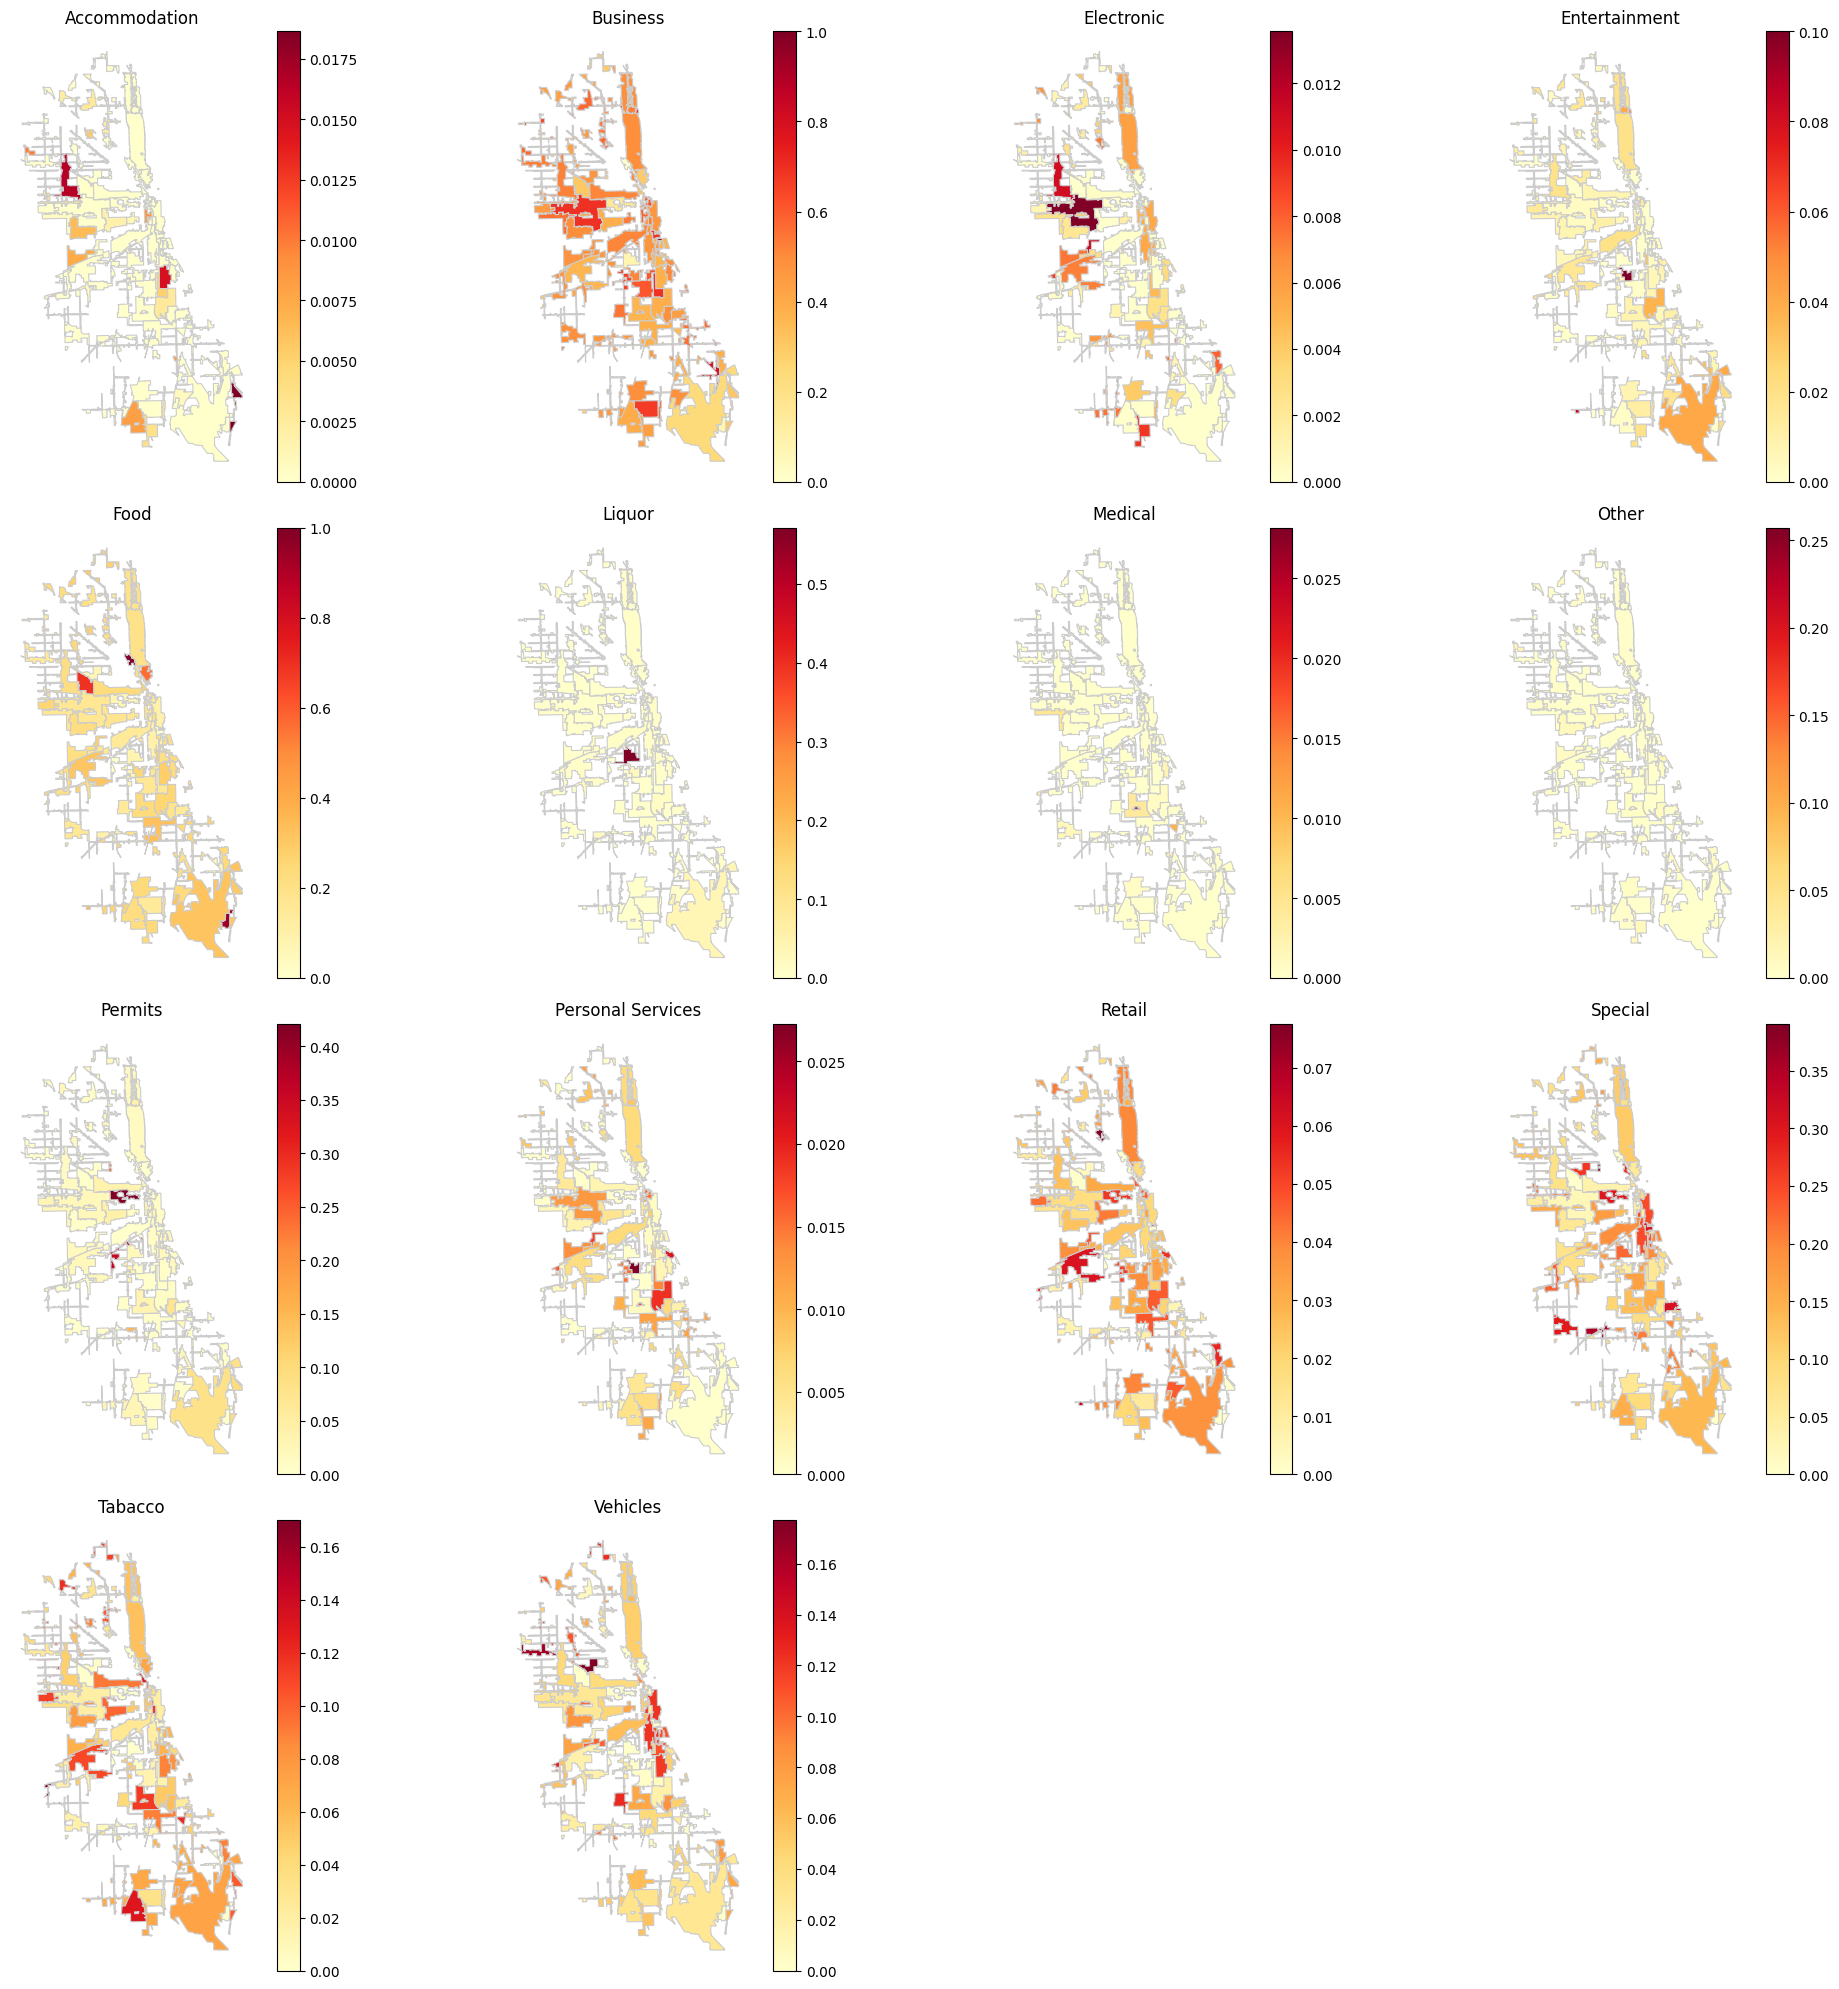

In [ ]:
columns = ['Accommodation', 'Business', 'Electronic', 'Entertainment', 'Food', 
           'Liquor', 'Medical', 'Other', 'Permits', 'Personal Services', 
           'Retail', 'Special', 'Tabacco', 'Vehicles']

# Calculate the number of rows and columns for the subplot grid
n_cols = 4
n_rows = int(len(columns) / n_cols) + (1 if len(columns) % n_cols else 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axs = axs.flatten()

# Loop through each column and plot
for i, column in enumerate(columns):
    tif_geo.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=axs[i], edgecolor='0.8', legend=True)
    axs[i].set_title(column)
    axs[i].set_axis_off()

# Hide any unused subplots
for ax in axs[len(columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


<AxesSubplot: title={'center': 'Tobacco'}>

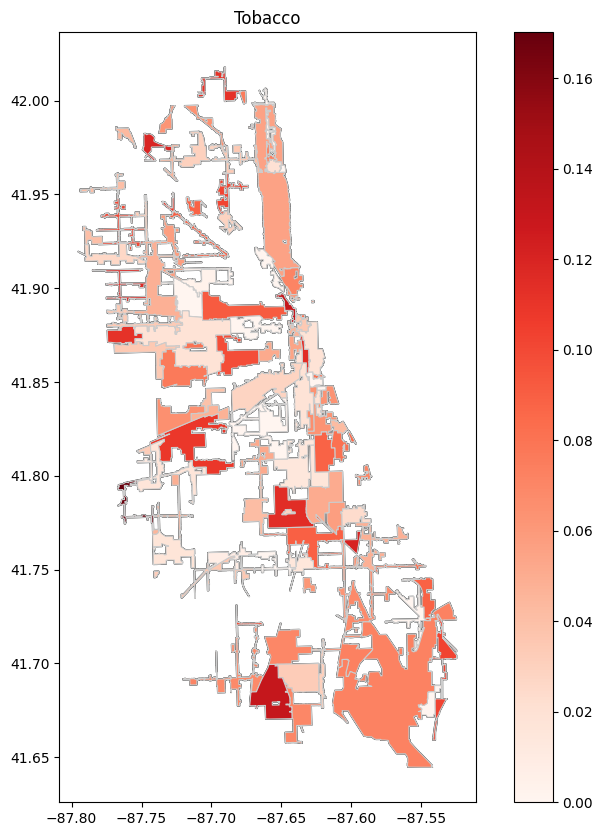

In [ ]:
lic_grp = 'Tabacco'
fig, ax = plt.subplots(figsize=(10, 10))
tif_geo.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.title('Tobacco')
# Customize the plot to display a heatmap of the number of companies
tif_geo.plot(column=lic_grp, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>